## Introduction to Statistical Learning Chapter 2 Exercises in Python

Excersises from Chapter 2 of An Introduction to Statistical Learning with Applications in R implemented in Python.

In [1]:
# load in our libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Question 8: College 

### 8a. Change our working directory, load in our data

In [2]:
college = pd.read_csv('data/College.csv')
# lets look at our data
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### 8b. Label each row by the college.

In [3]:
# get a list of college names
college_list = list(college.columns)
# label this list 'College'
college_list[0] = 'College'
# add this list as a column
college.columns = college_list
# reset the index of the rows from #s to college names from list
college.set_index('College', inplace=True)
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### 8c. Statistical Summary of the data

8ci. Get statistical summary

In [4]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


8cii. Make a scatter plot matric of the first ten columns in the dataframe

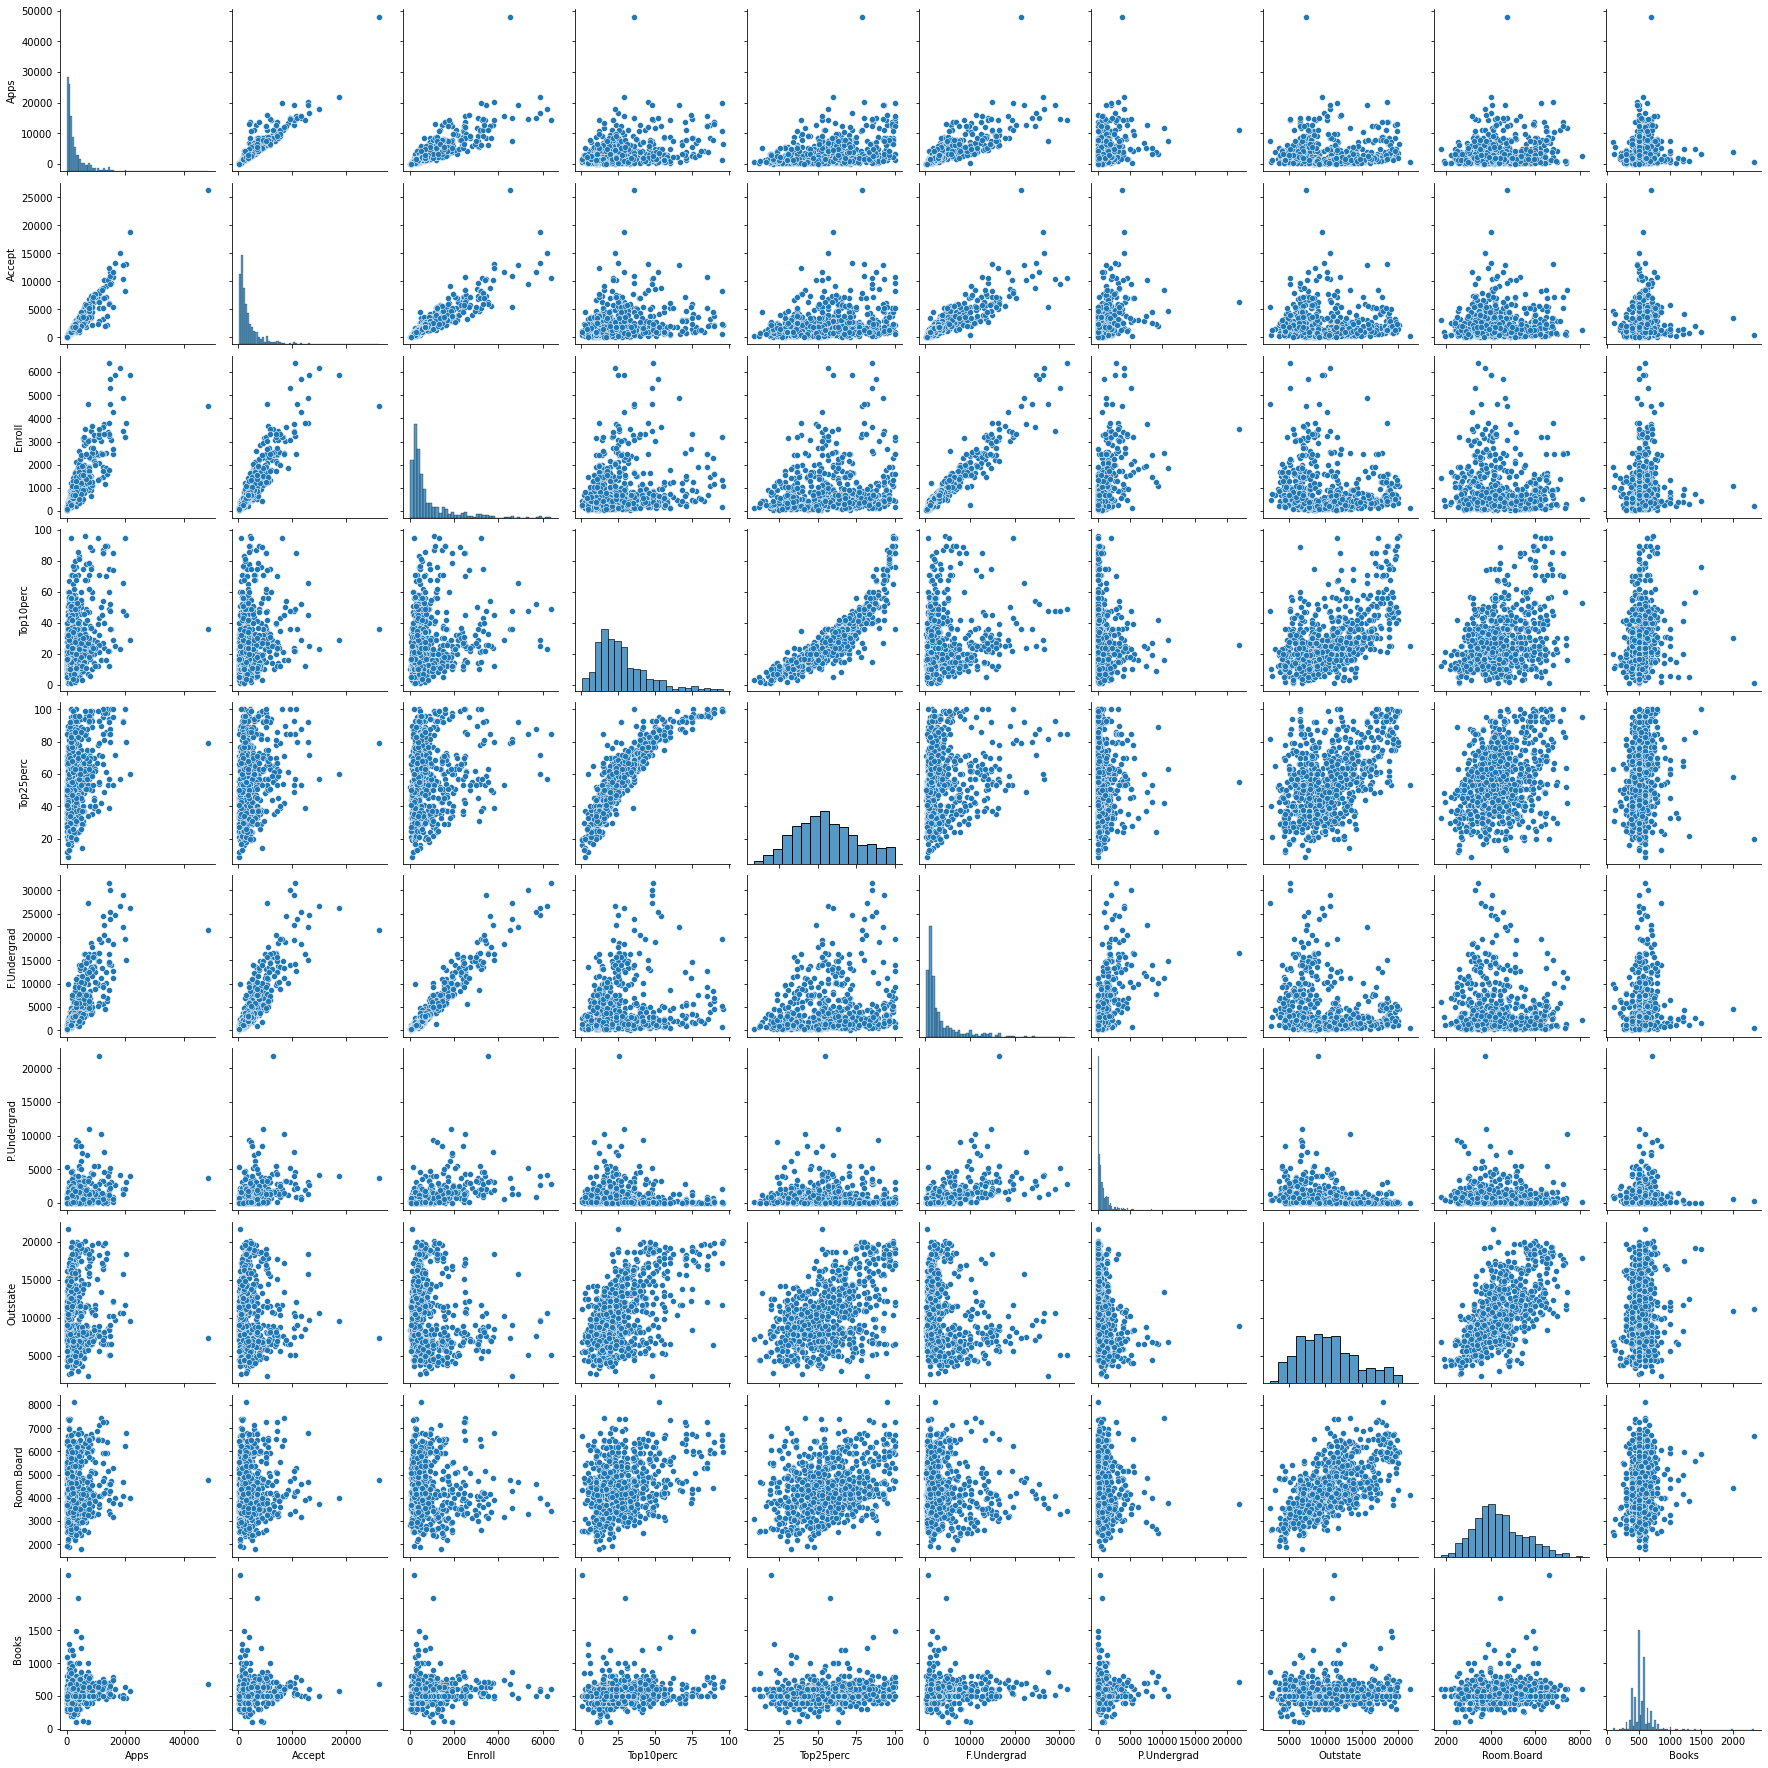

In [5]:
# grab the first 10 columns and their values.
first_ten = college.iloc[:, 1:11]
# scatter plot matrix
sns.pairplot(first_ten);

8ciii. Make a boxplot for Outstate vs Private

<AxesSubplot:xlabel='Private', ylabel='Outstate'>

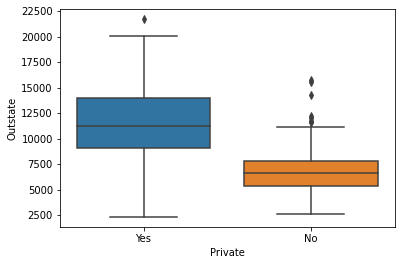

In [6]:
sns.boxplot(x="Private", y="Outstate", data=college)

8civ. Create an 'Elite' column by binning the Top10perc variable. Universities will be divided into two groups: 
1. *Elite = Yes* the proportion of students that were in the 10% of there HS make more more than 50% of the university students
2. *Elite = No* the proportion of students that were in the 10% of there HS make less than 50% of the university students

In [7]:
college['Elite'] = college['Top10perc'] > 50
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
College,,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,False
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,False
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,False
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,True
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,False


In [8]:
# calculate the number of universities labeled elite
college['Elite'].sum()

78

<AxesSubplot:xlabel='Elite', ylabel='Outstate'>

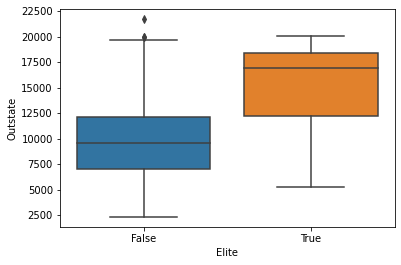

In [9]:
sns.boxplot(x="Elite", y="Outstate", data=college)

8cv. Make histograms with differing numbers of bins for all of the quantitative variables

<AxesSubplot:xlabel='Grad.Rate', ylabel='Count'>

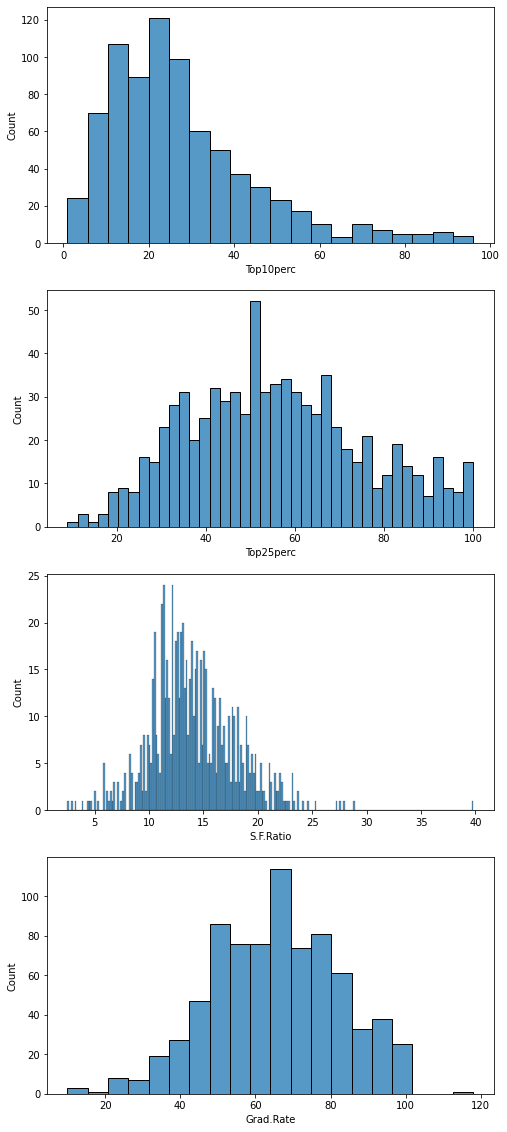

In [10]:

fig,(ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize = (8,20))
sns.histplot(college['Top10perc'], ax=ax1, bins=20)
sns.histplot(college['Top25perc'], ax=ax2, bins=40)
sns.histplot(college['S.F.Ratio'], ax=ax3, bins=230)
sns.histplot(college['Grad.Rate'], ax=ax4, bins=20)



8cvi. Continue to explore data and write what you find. 

<AxesSubplot:>

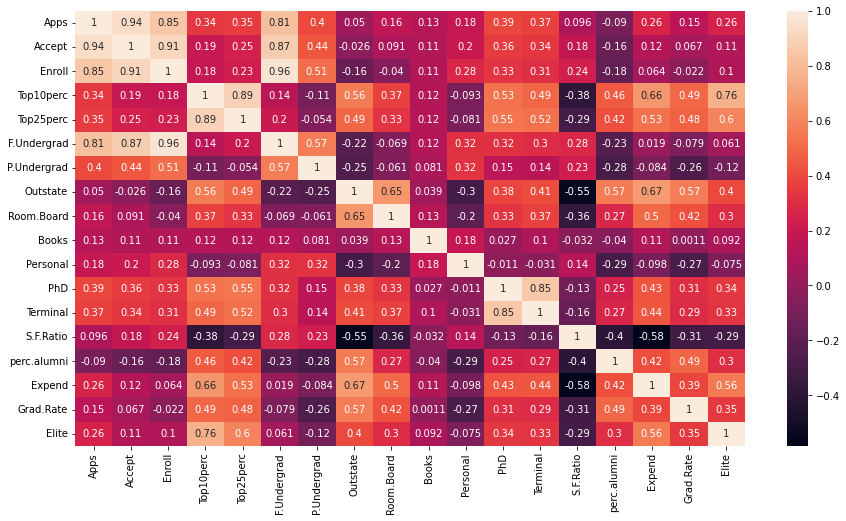

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(college.corr(), annot = True)

In [17]:
correlation = college[college.columns].corr()['Grad.Rate'][:]
correlation

Apps           0.146755
Accept         0.067313
Enroll        -0.022341
Top10perc      0.494989
Top25perc      0.477281
F.Undergrad   -0.078773
P.Undergrad   -0.257001
Outstate       0.571290
Room.Board     0.424942
Books          0.001061
Personal      -0.269344
PhD            0.305038
Terminal       0.289527
S.F.Ratio     -0.306710
perc.alumni    0.490898
Expend         0.390343
Grad.Rate      1.000000
Elite          0.348733
Name: Grad.Rate, dtype: float64

for further study, I performed a correlation analysis of the numeric variables of data, specifically what factors were msost correlated with Graduation rate. From the total-data correlation heatmap, we can see that there is a pocket of strong correlations between applications, enrolled student, and acceptance. The variable most correlated with the graduation rate is the out of state tuition. So, the higher the out of state tuition, the higher the graduation rate of the university. 